In [9]:
INFINITY = 10e12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [65]:
n_samples = 50
train_X = np.linspace(1, 50, n_samples)
train_Y = 10*train_X + 6 +40*np.random.randn(50)

In [66]:
%matplotlib inline

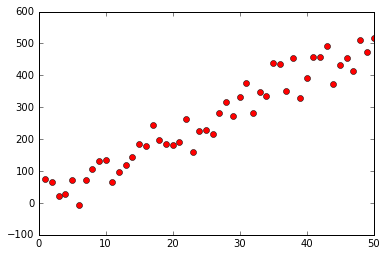

In [67]:
plt.plot(train_X, train_Y, 'ro')

In [139]:
def linear_regression(constraint_use=False):
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(np.random.randn(), name="weight")
    b = tf.Variable(np.random.randn(), name="bias")
    
    
    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)
    
    # Gradient descent
    learning_rate=0.0001
    # Initializing the variables
    init = tf.global_variables_initializer()
    
        # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    nn_w = tf.reduce_sum(tf.abs(W) - W)
    nn_b = tf.reduce_sum(tf.abs(b) - b)
    constraint = 1.0*nn_w + 100*nn_b
    cost_with_constraint = cost + constraint
    
    if constraint_use:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    else:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_with_constraint)
    
    
    training_epochs=20
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        cost_array = np.zeros(training_epochs)
        W_array = np.zeros(training_epochs)
        b_array = np.zeros(training_epochs)

        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict={X: x, Y: y})
                W_array[epoch] = sess.run(W)
                b_array[epoch] = sess.run(b)
                cost_array[epoch] = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    return W_array, b_array, cost_array

In [140]:
#W, b, c = linear_regression(False)
bnns = []
for i in range(10):
    W_nn, b_nn, c_nn = linear_regression(True)
    bnns.append(b_nn)

In [150]:
pd.DataFrame(bnns).T.describe().ix['mean']

0   -1.101268
1    0.169225
2    0.158363
3    0.706270
4   -0.371205
5    0.244424
6    1.312516
7   -0.069609
8   -1.032187
9   -1.711668
Name: mean, dtype: float64

### Comparing the models with and without non-negative constraints

In [74]:
# Without non-negative constraints


        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

Epoch: 0010 cost= 8507.264648438 W= 5.95957 b= 0.182251
Epoch: 0020 cost= 2202.038574219 W= 8.39647 b= 0.257571
Epoch: 0030 cost= 1072.242675781 W= 9.42703 b= 0.290754
Epoch: 0040 cost= 869.296325684 W= 9.86285 b= 0.306118
Epoch: 0050 cost= 832.629760742 W= 10.0471 b= 0.313944
Epoch: 0060 cost= 825.914245605 W= 10.125 b= 0.318582
Epoch: 0070 cost= 824.643615723 W= 10.1579 b= 0.321872
Epoch: 0080 cost= 824.384216309 W= 10.1718 b= 0.324592
Epoch: 0090 cost= 824.321960449 W= 10.1776 b= 0.32707
Epoch: 0100 cost= 824.301635742 W= 10.18 b= 0.329445
Epoch: 0110 cost= 824.291381836 W= 10.181 b= 0.331776
Epoch: 0120 cost= 824.284423828 W= 10.1814 b= 0.334089
Epoch: 0130 cost= 824.278686523 W= 10.1815 b= 0.336393
Epoch: 0140 cost= 824.273193359 W= 10.1815 b= 0.338694
Epoch: 0150 cost= 824.267761230 W= 10.1815 b= 0.340993
Epoch: 0160 cost= 824.262573242 W= 10.1815 b= 0.343292
Epoch: 0170 cost= 824.257263184 W= 10.1814 b= 0.34559
Epoch: 0180 cost= 824.251953125 W= 10.1813 b= 0.347888
Epoch: 0190 c